Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import extra #Just a python file holding our lists and arrays

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

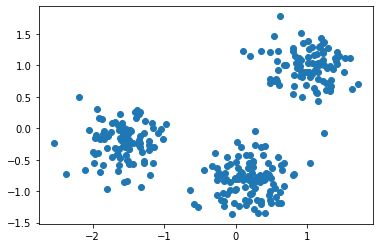

In [2]:
points = extra.points
new_points = extra.new_points

xs = points[:, 0]
ys = points[:, 1]

plt.scatter(xs, ys)
plt.show()

From the scatter plot of the previous cell, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

In [3]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


We've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. In the next exercise, you'll inspect your clustering with a scatter plot!

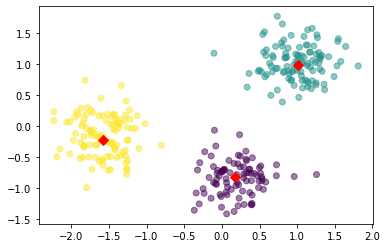

In [4]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Assign the columns of centroids: centroids_x, centroids_y
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, color = 'red', marker = 'D', s = 50)
plt.show()

The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

#### Measuring clustering quality
We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.

How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids. You can find the precise definition in the scikit-learn documentation. We want clusters that are not spread out, so lower values of the inertia are better. The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, kmeans aims to place the clusters in a way that minimizes the inertia.

Here is a plot of the inertia values of clusterings of the grain dataset with different numbers of clusters. Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

Ultimately, this is a trade-off. A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. A good rule of thumb is to choose an elbow in the inertia plot, that is, a point where the inertia begins to decrease more slowly. For example, by this criterion, 3 is a good number of clusters for the grain dataset.

In [5]:
samples = extra.samples

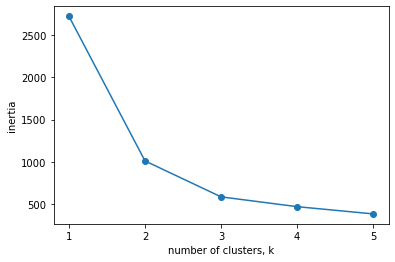

In [6]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

#### Evaluating the grain clustering
In the previous cell, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this cell, we will cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [7]:
labels = extra.labels
varieties = extra.varieties

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                       2          60          10
2                      68           9           0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

#### Transforming features for better clusterings


##### Scaling fish data for clustering
You are given an array `fish_samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.


In [ ]:
fish